SARIMAX for AAPL stock

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from datetime import datetime,timedelta

In [5]:
end = datetime.now()

In [6]:
data = yf.download('AAPL', start=end - timedelta(days=15*365),end=end, interval='1d',auto_adjust=True)

[*********************100%%**********************]  1 of 1 completed


In [7]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2009-08-25,5.110886,5.155523,5.100933,5.109076,324354800
2009-08-26,5.094598,5.113599,5.029453,5.049057,303998800
2009-08-27,5.089473,5.114203,4.971246,5.110585,449181600
2009-08-28,5.195634,5.202269,5.082837,5.128679,453700800
2009-08-31,5.071679,5.092489,5.021614,5.073187,311337600


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3772 entries, 2009-08-25 to 2024-08-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3772 non-null   float64
 1   High    3772 non-null   float64
 2   Low     3772 non-null   float64
 3   Close   3772 non-null   float64
 4   Volume  3772 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.8 KB


<Axes: xlabel='Date'>

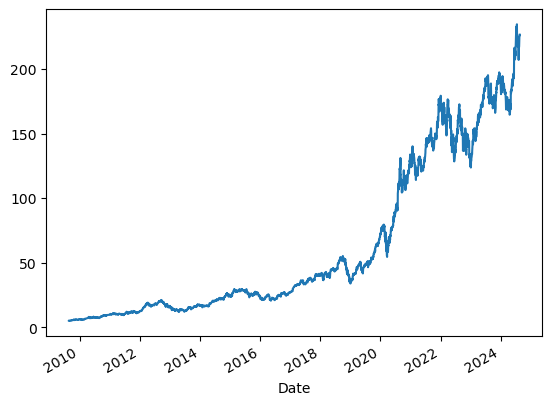

In [9]:
data['Close'].plot()

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3772.0,6.212792e+01,6.093930e+01,4.964910e+00,1.678538e+01,3.167539e+01,1.179612e+02,2.362066e+02
High,3772.0,6.279314e+01,6.160953e+01,5.039708e+00,1.691908e+01,3.182321e+01,1.194521e+02,2.369557e+02
Low,3772.0,6.149945e+01,6.032993e+01,4.949528e+00,1.659936e+01,3.157297e+01,1.164781e+02,2.328205e+02
Close,3772.0,6.217400e+01,6.100033e+01,4.981800e+00,1.670931e+01,3.179760e+01,1.180048e+02,2.345485e+02
Volume,3772.0,2.407200e+08,2.215862e+08,2.404830e+07,8.876785e+07,1.489890e+08,3.328731e+08,1.880998e+09


In [11]:
data['O-C'] = data['Open'] - data['Close']
data['H-L'] = data['High'] - data['Low']
data['Momentum'] = data['Close'] - data['Close'].shift(5)
data['MA'] = data['Close'].rolling(20).mean()
data['EMA'] = data['Close'].ewm(span=20,adjust=False).mean()
data['Returns'] = data['Close'].pct_change()
data.dropna(inplace=True)
data.head()

,Open,High,Low,Close,Volume,O-C,H-L,Momentum,MA,EMA,Returns
Date,,,,,,,,,,,
2009-09-22,5.585299,5.591029,5.514725,5.563885,356753600,0.021414,0.076305,0.281089,5.231932,5.304852,0.002499
2009-09-23,5.591632,5.697192,5.580472,5.594648,593563600,-0.003016,0.116719,0.109480,5.256211,5.332452,0.005529
2009-09-24,5.645920,5.661000,5.512312,5.543980,550880400,0.101940,0.148687,-0.022017,5.280957,5.352598,-0.009056
2009-09-25,5.489391,5.594648,5.472199,5.500248,445239200,-0.010857,0.122449,-0.079925,5.300440,5.366659,-0.007888
2009-09-28,5.545488,5.630237,5.529201,5.614252,337444800,-0.068764,0.101035,0.064237,5.324718,5.390240,0.020727


In [12]:
data['HC_'] = data['High'] / data['Low'] - 1
data['STD'] = data['Returns'].rolling(7).std()
data['UB'] = data['Close'].rolling(7).mean() + data['Close'].rolling(7).std()*2
data.dropna(inplace=True)
data.head()

,Open,High,Low,Close,Volume,O-C,H-L,Momentum,MA,EMA,Returns,HC_,STD,UB
Date,,,,,,,,,,,,,,
2009-09-30,5.613650,5.623301,5.507488,5.590126,539585200,0.023524,0.115814,-0.004522,5.380846,5.426578,-0.000161,0.021028,0.010163,5.648554
2009-10-01,5.590125,5.616363,5.449881,5.454707,524711600,0.135418,0.166482,-0.089273,5.404491,5.429257,-0.024225,0.030548,0.013878,5.673299
2009-10-02,5.471296,5.607919,5.469486,5.576553,553308000,-0.105257,0.138433,0.076305,5.432163,5.443285,0.022338,0.025310,0.016713,5.667459
2009-10-05,5.615759,5.635665,5.557550,5.610330,423133200,0.005429,0.078114,-0.003922,5.455853,5.459194,0.006057,0.014055,0.016373,5.684215
2009-10-06,5.662208,5.730670,5.648938,5.730670,605085600,-0.068462,0.081732,0.139642,5.481610,5.485049,0.021450,0.014469,0.017208,5.756777


In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

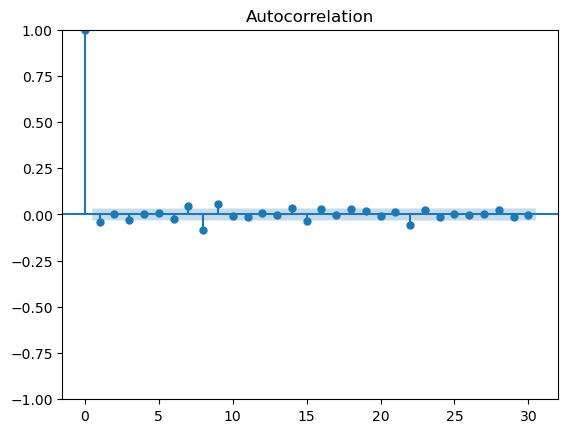

In [14]:
plot_acf(data.Returns,lags=30);

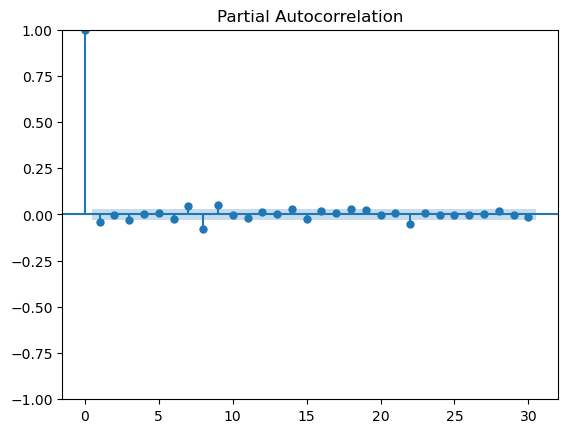

In [15]:
plot_pacf(data.Returns, lags=30);

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
adfuller(data.Returns)

(-20.52294946642992,
 0.0,
 8,
 3738,
 {'1%': -3.4321006143182444,
  '5%': -2.8623135247610696,
  '10%': -2.5671817580180245},
 -19487.96817614058)

In [18]:
import seaborn as sns

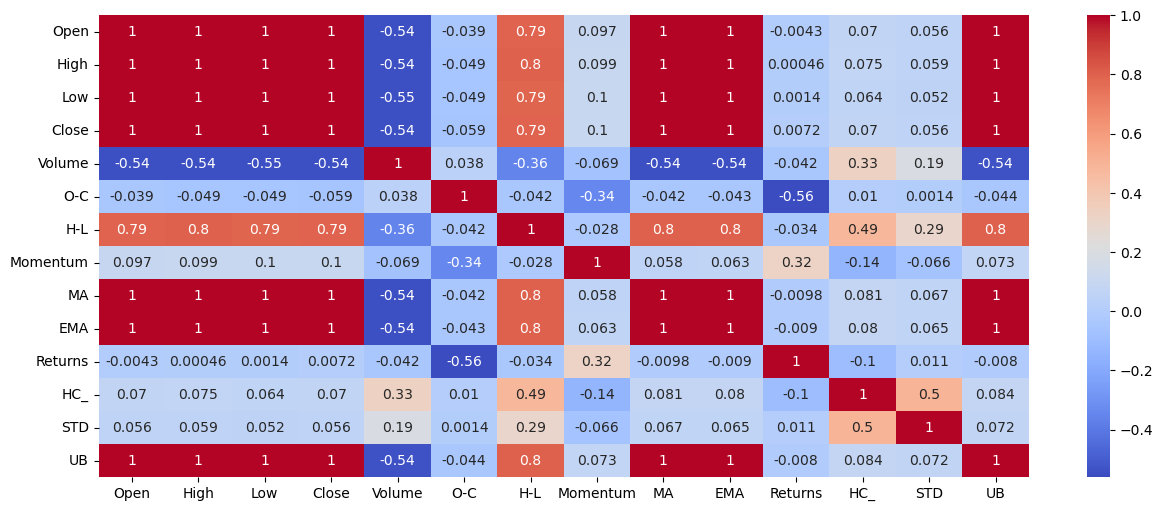

In [19]:
corr = data.corr()

plt.figure(figsize=(15,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [20]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'O-C', 'H-L', 'Momentum',
       'MA', 'EMA', 'Returns', 'HC_', 'STD', 'UB'],
      dtype='object')

In [35]:
exog_features = [ 'O-C',  'Momentum', 'HC_', 'STD']

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

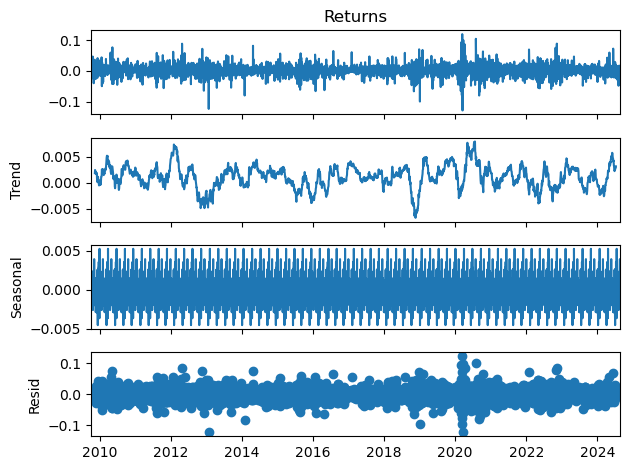

In [23]:
seasonal_add = seasonal_decompose(data.Returns, model='additive', period=60)
seasonal_add.plot()
plt.show()

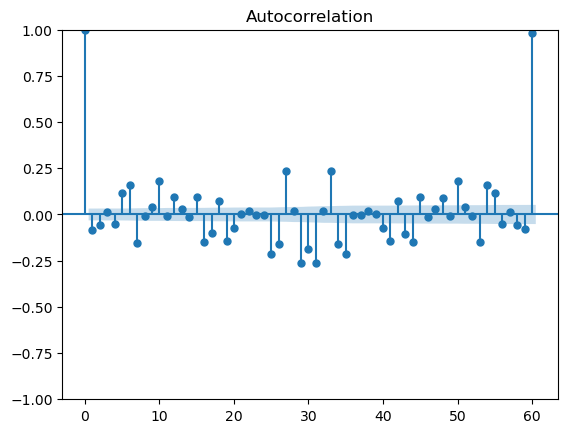

In [24]:
plot_acf(seasonal_add.seasonal, lags=60);

In [36]:
X = data.Returns
X_exog = data[exog_features]
split_point = int(len(data.Returns) * 0.8)

X_train = X[:split_point]
X_test = X[split_point:]

X_exog_train = X_exog[:split_point]
X_exog_test = X_exog[split_point:]

len(X) == len(X_train) + len(X_test)

True

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
X_exog_train_scaled = scaler.fit_transform(X_exog_train)
X_exog_test_scaled = scaler.transform(X_exog_test)

In [28]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
model_auto = auto_arima(X_train, exogenous = X_exog_train_scaled,
                        start_p=0, max_p=3,
                        start_q=0, max_q=3,
                        d=None,
                        seasonal=True, m=60,
                        start_P=0,max_P=3,
                        start_Q=0,max_Q=3,
                        D=None,
                        test='adf',
                        seasonal_test='ocsb',
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[60] intercept   : AIC=-15663.642, Time=0.34 sec
 ARIMA(1,0,0)(1,0,0)[60] intercept   : AIC=-15667.574, Time=18.21 sec
 ARIMA(0,0,1)(0,0,1)[60] intercept   : AIC=-15667.449, Time=42.92 sec
 ARIMA(0,0,0)(0,0,0)[60]             : AIC=-15650.862, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[60] intercept   : AIC=-15669.601, Time=0.19 sec
 ARIMA(1,0,0)(0,0,1)[60] intercept   : AIC=-15667.606, Time=25.82 sec
 ARIMA(1,0,0)(1,0,1)[60] intercept   : AIC=-15665.621, Time=194.58 sec
 ARIMA(2,0,0)(0,0,0)[60] intercept   : AIC=-15667.914, Time=0.87 sec
 ARIMA(1,0,1)(0,0,0)[60] intercept   : AIC=-15668.714, Time=1.07 sec
 ARIMA(0,0,1)(0,0,0)[60] intercept   : AIC=-15669.444, Time=1.53 sec
 ARIMA(2,0,1)(0,0,0)[60] intercept   : AIC=-15665.869, Time=4.18 sec
 ARIMA(1,0,0)(0,0,0)[60]             : AIC=-15655.297, Time=0.24 sec

Best model:  ARIMA(1,0,0)(0,0,0)[60] intercept
Total fit time: 290.205 seconds


In [30]:
print(model_auto.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2997
Model:               SARIMAX(1, 0, 0)   Log Likelihood                7837.801
Date:                Wed, 21 Aug 2024   AIC                         -15669.601
Time:                        12:03:57   BIC                         -15651.585
Sample:                             0   HQIC                        -15663.120
                               - 2997                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0013      0.000      4.030      0.000       0.001       0.002
ar.L1         -0.0515      0.012     -4.358      0.000      -0.075      -0.028
sigma2         0.0003   4.42e-06     70.897      0.0

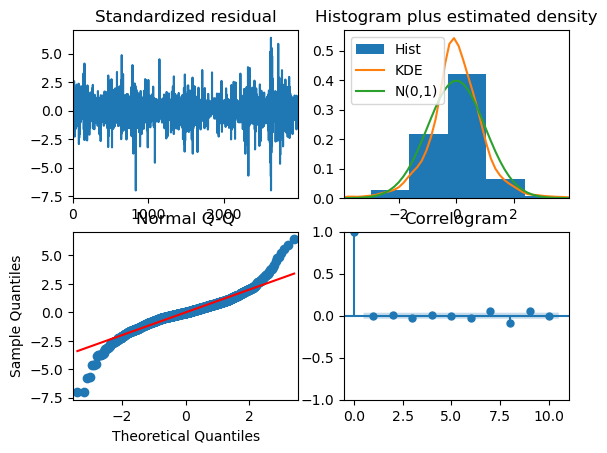

In [31]:
model_auto.plot_diagnostics();

In [32]:
order = model_auto.order
season_order = model_auto.seasonal_order
model = SARIMAX(X_train, order=order, seasonal_order=season_order)
model_fit = model.fit()
model_fit.summary()

c:\Users\gongo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gongo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Returns   No. Observations:                 2997
Model:               SARIMAX(1, 0, 0)   Log Likelihood                7829.649
Date:                Wed, 21 Aug 2024   AIC                         -15655.297
Time:                        12:12:16   BIC                         -15643.286
Sample:                             0   HQIC                        -15650.977
                               - 2997                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0463      0.012     -3.910      0.000      -0.070      -0.023
sigma2         0.0003   4.47e-06     70.423      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              3783.16
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
model_exog = SARIMAX(X_train, exog=X_exog_train_scaled, order=order, seasonal_order=season_order)
model_exog_fit = model_exog.fit()
model_exog_fit.summary()

c:\Users\gongo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gongo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Returns   No. Observations:                 2997
Model:               SARIMAX(1, 0, 0)   Log Likelihood                8496.143
Date:                Wed, 21 Aug 2024   AIC                         -16980.286
Time:                        12:15:41   BIC                         -16944.254
Sample:                             0   HQIC                        -16967.325
                               - 2997                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0092      0.000    -55.714      0.000      -0.010      -0.009
x2             0.0026      0.000     15.594      0.000       0.002       0.003
x3            -0.0017      0.000     -7.901      0.000      -0.002      -0.001
x4             0.0014      0.000      7.959      0.000       0.001       0.002
ar.L1         -0.0181      0.012     -1.553      0.120      -0.041       0.005
sigma2         0.0002    2.5e-06     80.650      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):              8988.05
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.17
Prob(H) (two-sided):                  0.07   Kurtosis:                        11.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

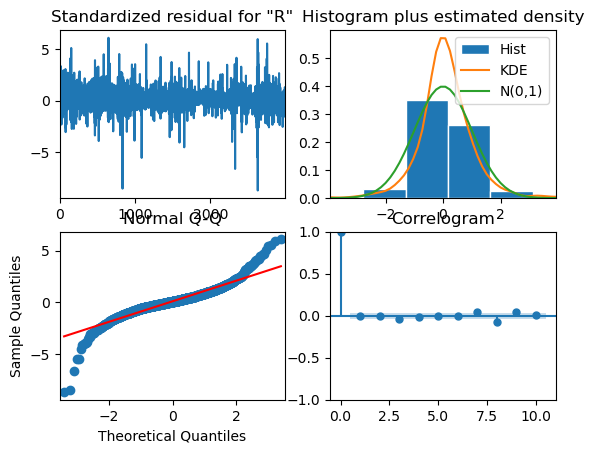

In [40]:
model_exog_fit.plot_diagnostics();

In [41]:
predictions = model_exog_fit.get_forecast(steps=len(X_test), exog=X_exog_test_scaled)

predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int()

c:\Users\gongo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gongo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [43]:
conf_int

,lower Returns,upper Returns
2997,-0.036693,0.018996
2998,-0.014225,0.041472
2999,0.025068,0.080765
3000,-0.034675,0.021023
3001,-0.026878,0.028820
...,...,...
3742,0.001863,0.057560
3743,-0.011951,0.043746
3744,0.011024,0.066721
3745,-0.015680,0.040018


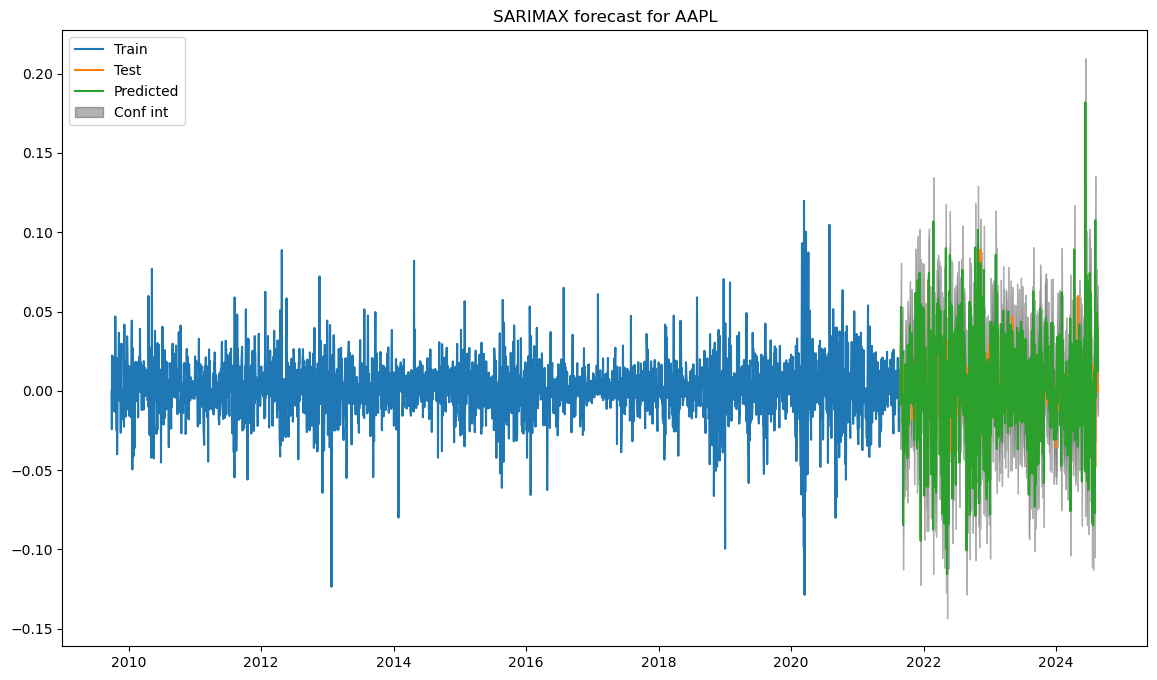

In [44]:
plt.figure(figsize=(14,8))
plt.plot(X_train, label='Train')
plt.plot(X_test, label='Test')
plt.plot(X_test.index, predicted_mean, label='Predicted')
plt.fill_between(X_test.index, conf_int['lower Returns'], conf_int['upper Returns'], color='black', alpha=0.3, label='Conf int')
plt.title('SARIMAX forecast for AAPL')
plt.legend()
plt.show()

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
mae_sarimax = mean_absolute_error(X_test, predicted_mean)
mse_sarimax = mean_squared_error(X_test, predicted_mean)
rmse_sarimax = mean_squared_error(X_test, predicted_mean, squared=False)
rmse_sarimax

c:\Users\gongo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.022641095002358783

In [48]:
model_exog_fit.resid

Date
2009-09-30    0.001598
2009-10-01   -0.020207
2009-10-02    0.021561
2009-10-05    0.006083
2009-10-06    0.019987
                ...   
2021-08-19   -0.014053
2021-08-20    0.001197
2021-08-23   -0.005053
2021-08-24   -0.002406
2021-08-25    0.007513
Length: 2997, dtype: float64

In [49]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test
dw_stat = durbin_watson(model_exog_fit.resid)

In [50]:
dw_stat

2.000724550943065